<a href="https://colab.research.google.com/github/erica-mccormick/widespread-bedrock-water-use/blob/main/Code_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![DOI](https://zenodo.org/badge/357586333.svg)](https://zenodo.org/badge/latestdoi/357586333)


# **PART 2: Code for *Evidence for widespread woody plant use of water stored in bedrock***
**Erica McCormick, David Dralle, W. Jesse Hahm, Alison Tune, Logan Schmidt, Dana Chadwick, and Daniella Rempe**

---

All data products are available in the [Hydroshare repository](https://doi.org/10.4211/hs.a2f0d5fd10f14cd189a3465f72cba6f3).

See [Github](https://github.com/erica-mccormick/widespread-bedrock-water-use) or [Zenodo](http://doi.org/10.5281/zenodo.4904036) for Part 1 and more information on data inputs and products.

For more information, see [website](https://erica-mccormick.github.io/widespread-bedrock-water-use/).

---


Authenticate GoogleDrive Google Earth Engine (GEE) account. First time users sign-up [here](https://earthengine.google.com/new_signup/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')\

Mounted at /content/drive


In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=56A_l-_RxGVZ_LqOaK-HZCTh3DMuXNyvOdqkAqLxbbU&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g6oNUj2ZnczbALr88x03UhI0tIyLfvkfVUYu-xFrTiad_BCcineDMU

Successfully saved authorization token.


### **1. GEE Asset IDs**

Public Assets

In [ ]:
prism = ee.ImageCollection("OREGONSTATE/PRISM/AN81d")
pml = ee.ImageCollection("CAS/IGSNRR/PML/V2")
USGS_landcover = ee.ImageCollection("USGS/NLCD")
modis_landcover = ee.ImageCollection("MODIS/006/MCD12Q1")
snow_cover = ee.ImageCollection("MODIS/006/MOD10A1").select('NDSI_Snow_Cover')
land_cover = ee.ImageCollection("MODIS/006/MCD12Q1")

Assets generated/uploaded for this project:

- - -
* Note: Because GEE assets cannot be gauranteed as a permanent storage option, tifs are also availalbe in the Hydroshare repository. If the links to these assets no longer function, or if you prefer, please upload your own personal GEE asets based on the provided tifs and replace links below.

* All assets given here have been masked with the raster "mask_reproj."
* The first chunk includes ImagesCollections of the assets produced in this project. Go to the GEE links to find more links & descriptions.


In [ ]:
# Images collections:

gNATSGO = ee.ImageCollection('users/ericamccormick/gNATSGO') #https://code.earthengine.google.com/?asset=users/ericamccormick/gNATSGO
Masks = ee.ImageCollection('users/ericamccormick/masking_layers') #https://code.earthengine.google.com/?asset=users/ericamccormick/masking_layers
Dbedrock = ee.ImageCollection('users/ericamccormick/Dbedrock') #https://code.earthengine.google.com/?asset=users/ericamccormick/Dbedrock

In [ ]:
#Geometries
ca = ee.Feature(ee.FeatureCollection("users/daviddralle/ca_et/CA").first())
conus = ee.FeatureCollection('users/ericamccormick/20_RockMoisture/geometries/conus_20m')
texas = ee.FeatureCollection('users/ericamccormick/20_RockMoisture/geometries/TX')

#Dbedrock,Y
drock04 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2004')
drock05 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2005')
drock06 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2006')
drock07 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2007')
drock08 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2008')
drock09 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2009')
drock10 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2010')
drock11 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2011')
drock12 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2012')
drock13 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2013')
drock14 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2014')
drock15 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2015')
drock16 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2016')
drock17 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2017')

#Median Dbedrock,Y
Dbedrock_median_zeros = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_median')

#Masks
woodveg_x_shallowbedrock = ee.Image('users/ericamccormick/20_RockMoisture/masks/woodyVeg_x_shallowBedrock')
woodyveg = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_woodyVeg')
shallowbedrock = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_shallowBedrock')
mask_reproj = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_reproj') #final mask for non-woody veg, non-shallow soil, AND ET>P

#Sbedrock and Sr
Sbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Sbedrock') 
Sr = ee.Image('users/ericamccormick/20_RockMoisture/deficit/root-zone/Sr2003_2017_Mask') #see Dralle et al., 2020 for 1 km, unmasked version. (10.5194/hess-25-2861-2021)

#gNATSGO
Ssoil = ee.Image('users/ericamccormick/20_RockMoisture/products/gNATSGO/Ssoil_500m')
densic = ee.Image('users/ericamccormick/20_RockMoisture/products/gNATSGO/densic_weavg_lower_reprojected') # Soil Survey Staff, 2020
paralithic = ee.Image('users/ericamccormick/20_RockMoisture/products/gNATSGO/paralithic_weavg_lower_reprojected') # Soil Survey Staff, 2020

#Other
koppen = ee.Image('users/ericamccormick/20_RockMoisture/products/Koppen_Global') # Peel et al., 2007 (https://doi.org/10.5194/hess-11-1633-2007)
MAP = ee.Image('users/ericamccormick/MAP') # Aggregated from precipitation from Daly et al., 2008 (10.1002/joc.1688)
MeanAnnualPET = ee.Image('users/ericamccormick/MeanAnnualPET') # Aggregated from ET from Zhang et al., 2019 (10.1016/j.rse.2018.12.031)
CA_abovegroundbiomass = ee.Image('users/ericamccormick/aboveground_biomass_carbon_2010_scaled_CA') # Spawn et al., 2020 (https://doi.org/10.3334/ORNLDAAC/1763)


Imports

In [ ]:
!pip install -q geopandas
!pip install -q rasterio
!pip install -q scikit-posthocs

     |████████████████████████████████| 1.0MB 5.0MB/s 
     |████████████████████████████████| 6.6MB 10.9MB/s 
     |████████████████████████████████| 15.4MB 214kB/s 
     |████████████████████████████████| 19.3MB 73.5MB/s 
     |████████████████████████████████| 51kB 3.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import files
from IPython.display import Image
import seaborn as sns
import rasterio as rio
from rasterio.plot import show
import matplotlib.ticker as ticker
import geopandas
import requests
from scipy import stats
%matplotlib inline

#Suppress showing dataframes in scientific notation
pd.options.display.float_format = '{:.4f}'.format

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 7

## **2. Figure 2**: 

In [ ]:
#Hydroshare repository of literature compilation
url = 'https://www.hydroshare.org/resource/a2f0d5fd10f14cd189a3465f72cba6f3/data/contents/literature_compilation.csv'
roots = pd.read_csv(url)

In [ ]:
## Extract cleaned numerical data
papers = roots['Citation']
root = roots['Root_Depth_NumberLine_m']
soildepth = roots['SoilDepth_Numberline_cm']/100 # make meters to match root depth
slope = roots['Slope_Numberline_Percent']
lat = roots['Latitude']
long = roots['Longitude']
MAP = roots['MAP_Numberline_mm']

In [ ]:
print('The number of observations for each group:')
print('Rooting depth:', root.count())
print('Soil depth:', soildepth.count())
print('Slope:', slope.count())
print('MAP:', MAP.count())
print('Number of total observations, including duplicates from the same site:',lat.count())
print('Number of sites in total:', len(lat.unique()))
print('Number of unique papers:', len(papers.unique()))

The number of observations for each group:
Rooting depth: 88
Soil depth: 99
Slope: 75
MAP: 115
Number of total observations, including duplicates from the same site: 133
Number of sites in total: 76
Number of unique papers: 64


In [ ]:
#separate lat and long with evidence of RM ET
estimate = roots[roots['Measurement or Estimate of RM Contribution to ET?']=='Y']
not_estimate = roots[roots['Measurement or Estimate of RM Contribution to ET?']=='N']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1800x1200 with 0 Axes>

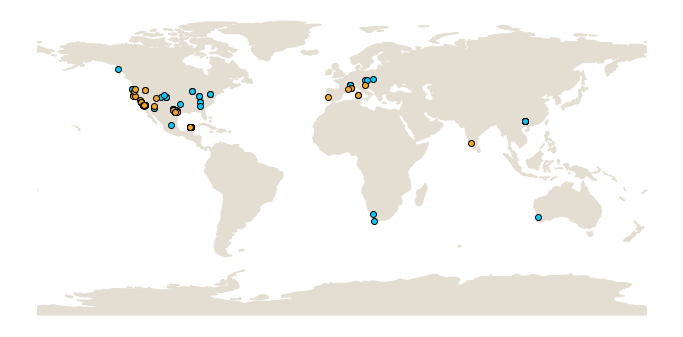

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
plt.figure(dpi=300)
base = world.plot(figsize = (12,9),color='#e3ded1',edgecolor='#e3ded1') #f2f0eb
plt.plot(not_estimate['Longitude'],not_estimate['Latitude'],'o',c='#00CDFF',markeredgecolor='k',markersize = '6')
plt.plot(estimate['Longitude'],estimate['Latitude'],'o',c = '#f2a916',markeredgecolor='k',markersize = '6')

plt.axis('off');

plt.savefig("world_rir.pdf",dpi=600)
files.download("world_rir.pdf") 

## **3. Figures 3B & ED 7**

In [ ]:
#Hydroshare repository of literature compilation
url = 'https://www.hydroshare.org/resource/a2f0d5fd10f14cd189a3465f72cba6f3/data/contents/literature_compilation.csv'
roots = pd.read_csv(url)

Figure 3B:

In [ ]:
## Extract Columns for Barplot (NOTE: Must exclude first header row manually)
barplot = pd.DataFrame()
barplot = roots[['Citation', 'Minimum','Maximum','Number_For_Plotting', 'Order_For_Plotting','S_soil_mm','Median_D_bedrock_mm']].copy()
#barplot = barplot.dropna()
barplot['S_soil_mm'] = barplot['S_soil_mm'] * -1 # Make soils negative for plotting in negative x-space
barplot['Name'] = (barplot['Number_For_Plotting']).astype(str) # make name column string

barplot = barplot[0:20]
barplot = barplot.sort_values(by = 'Order_For_Plotting')
barplot = barplot.dropna()
barplot

,Citation,Minimum,Maximum,Number_For_Plotting,Order_For_Plotting,S_soil_mm,Median_D_bedrock_mm,Name
0,"Rempe and Dietrich, 2018",140.0000,420.0000,1),1.0000,-138.4206,228.0000,1)
1,"Hahm, 2020",37.0000,173.0000,2),2.0000,-112.8634,125.0000,2)
3,"O'Geen, 2018",44.0000,270.0000,3),4.0000,-43.7858,392.0000,3)
5,Hubbert 2001b,135.0000,380.0000,4),5.0000,-88.3264,348.0000,4)
10,"Bornyasz, 2005",120.0000,120.0000,5),6.0000,-69.1180,122.0000,5)
13,"Sternberg, 1996",394.0000,406.0000,6),8.0000,-28.2299,86.0000,6)
16,"McCole and Stern, 2007",999.0000,999.0000,7),10.0000,-28.3432,194.0000,7)
19,"Schwinning, 2008",999.0000,999.0000,8),11.0000,-30.6851,210.0000,8)


In [ ]:
# Make labels for X-axis to have accurate Ssoil and Dbedrock meanings
soillabels = list(np.arange(150, -50, step=-50))
dlabels = list(np.arange(50, 500, step=50))
labels = soillabels + dlabels

Plot bar graph. Brown (left) represents $S_{soil}$ (mm) and blue (right) is median $D_{bedrock}$ (mm). For site locations, see literature compilation csv or Fig 2 inset maps.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

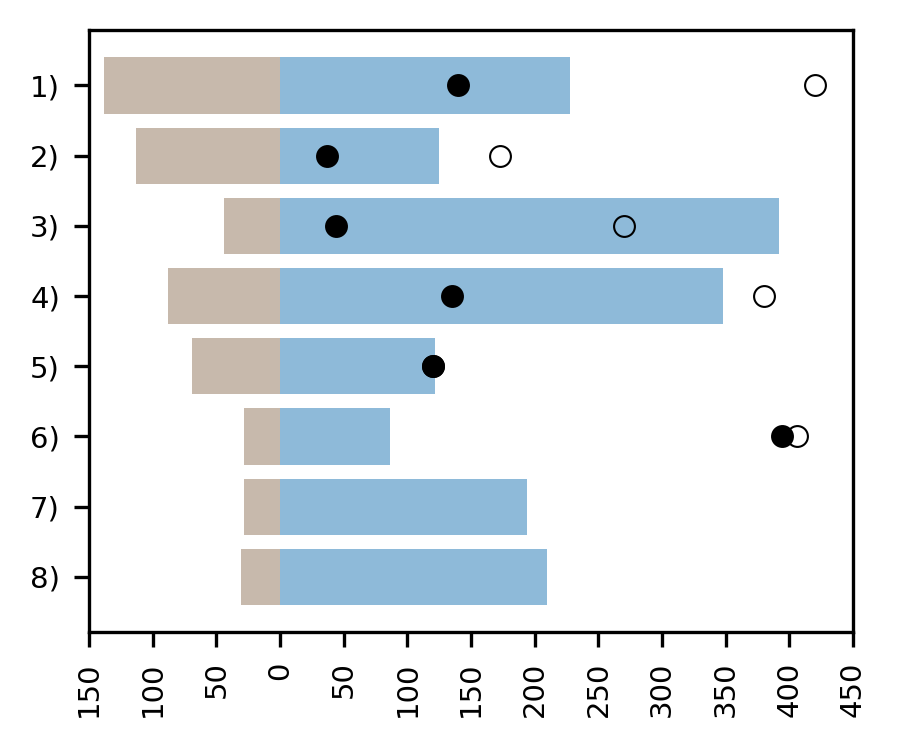

In [ ]:
# Plot figure
plt.figure(figsize = (3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['Median_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(barplot['Name'],barplot['S_soil_mm'], color = '#91755a',alpha=0.5)

plt.plot(barplot['Minimum'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
plt.plot(barplot['Maximum'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

plt.xticks(np.arange(-150, 500, step=50), labels = labels)
plt.xlim(-150, 450)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tight_layout()

## Uncomment for downloading fig
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("doublebar.pdf", transparent=True)
files.download("doublebar.pdf") 

Figure ED7:

In [ ]:
SI = pd.DataFrame()
SI = roots[['Citation','S_soil_mm','Median_D_bedrock_mm','Number_For_Plotting']].copy()
SI['S_soil_mm'] = SI['S_soil_mm'] * -1 # Make soils negative for plotting in negative x-space
SI['Name'] = (SI['Citation'])#.astype(str) # make name column string
SI = SI.drop_duplicates(subset='Name')
SI = SI[SI['Number_For_Plotting'].isna()]
del SI['Number_For_Plotting']
SI = SI.dropna()
SI = SI.sort_values(by = 'Median_D_bedrock_mm', ascending = False)
SI

,Citation,S_soil_mm,Median_D_bedrock_mm,Name
12,"Fellows and Goulden, 2012",-35.2000,327.0000,"Fellows and Goulden, 2012"
11,"Hellmers, 1995",-0.0000,269.0000,"Hellmers, 1995"
67,"Zwieniecki and Newton, 1996",-150.7852,187.7148,"Zwieniecki and Newton, 1996"
18,"Litvak, 2020",-30.6470,171.3530,"Litvak, 2020"
9,"Arkley,1981",-124.2084,171.2916,"Arkley,1981"
2,"Pedrazas, 2021",-74.2000,144.0000,"Pedrazas, 2021"
131,"Dammeyer, 2016",-51.0000,123.0000,"Dammeyer, 2016"
15,"Twidwell et al., 2013",-34.1315,106.0000,"Twidwell et al., 2013"
27,"Davis, 1977",-32.2000,94.8000,"Davis, 1977"
130,"West, 2007",-35.7466,73.7534,"West, 2007"


In [ ]:
soillabels = list(np.arange(200, -50, step=-50))
dlabels = list(np.arange(50, 350, step=50))
labels = soillabels + dlabels

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

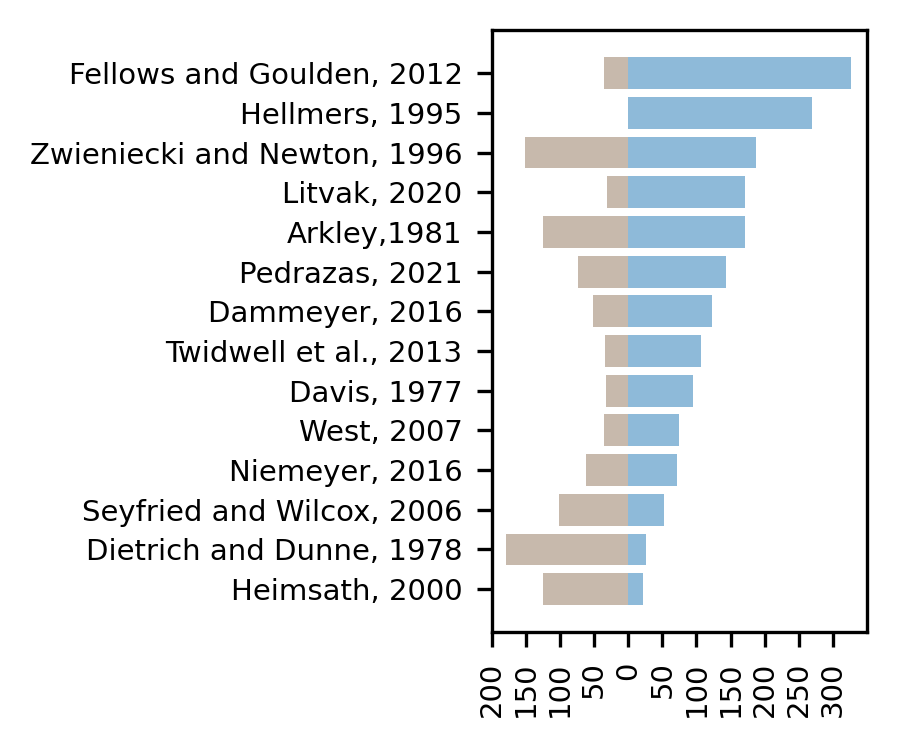

In [ ]:
# Plot figure
plt.figure(figsize =(3, 2.5), dpi=300)
#plt.barh(barplot['Name'],barplot['Mean_D_bedrock_mm'], xerr = barplot['Stdev_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(SI['Name'],SI['Median_D_bedrock_mm'], alpha=0.5, ecolor='black', capsize=3)
plt.barh(SI['Name'],SI['S_soil_mm'], color = '#91755a',alpha=0.5)

#plt.plot(barplot['Minimum'],barplot['Name'], 'o', ms=5, markerfacecolor="black", markeredgecolor='black', markeredgewidth=0.5)
#plt.plot(barplot['Maximum'],barplot['Name'],'o', ms=5, markerfacecolor="None", markeredgecolor='black', markeredgewidth=0.5)

plt.xticks(np.arange(-200, 350, step=50), labels = labels)
plt.xlim(-200, 350)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.tight_layout()

## Uncomment for downloading fig
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("SI_bar.pdf", transparent=True)
files.download("SI_bar.pdf") 

## **4. ED6 and ED Table 1**:

**Start here to reproduce analysis from scratch, or see below to start from .csv available in Hydroshare**

In [ ]:
# Assemble 3 data products plus area into one image with 4 bands
sbedrock = ee.Image("users/ericamccormick/20_RockMoisture/deficit/bedrock/Sbedrock").select(['S_R_snow_corr'],['Sbedrock']).reproject(crs='EPSG:4326',scale=500)
modis_landcover = ee.ImageCollection("MODIS/006/MCD12Q1").sort('system:time_start', False).first().select(['LC_Type1'],['Landcover']).reproject(crs='EPSG:4326',scale=500)
koppen = ee.Image("users/ericamccormick/20_RockMoisture/products/Koppen_Global").clip(conus.geometry()).select(['b1'],['Koppen']).reproject(crs='EPSG:4326',scale=500)

mask = sbedrock.gte(-50000)
landcover_mask = modis_landcover.updateMask(mask)
sbedrock_mask = sbedrock.updateMask(mask)
koppen_mask = koppen.updateMask(mask)

## Get band that is the area of each pixel
area = mask.multiply(ee.Image.pixelArea()).select(['Sbedrock'],['Area'])

## Combine into one image with 4 bands
all = sbedrock_mask.addBands(landcover_mask).addBands(koppen_mask).addBands(area)
all.bandNames().getInfo()

['Sbedrock', 'Landcover', 'Koppen', 'Area']

Export image to googleDrive and call back in (or access via Hydroshare). Exporting to drive will take ~20 minutes and you may have to merge tiled output tifs prior to importing back into this script.

In [ ]:
all = all.reproject(crs='EPSG:4326',scale=500).clip(conus.geometry())
task_config = {
        'region': conus.geometry(),
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'Sbedrock_distributions2',
        'image': all.toDouble(),
        'description': 'Sbedrock_distributions2',
        'maxPixels': 10000000000000
    }

task=ee.batch.Export.image.toDrive(**task_config)
task.start()

Next step: Replace the "all_tif_path_1" and "all_tif_path_2" links with the links to your own GoogleDrive copy of the exported "all" tif from GEE. There are two resulting tifs because the output was tiled by GEE. The dataframe from these final steps is available in the Hydroshare, linked below.

In [ ]:
your path = ''
all_tif_path_1 = your_path + '/Sbedrock_distributions2-0000000000-0000000000.tif'

all_tif_1 = rio.open(all_tif_path_1)
all_array_1 = all_tif_1.read()
print(all_array_1.shape)

## Flatten each band into its own array
sbedrock = all_array_1[0,:,:].flatten()
modis = all_array_1[1,:,:].flatten()
koppen = all_array_1[2,:,:].flatten()
area = all_array_1[3,:,:].flatten()

## Add each array to a dataframe
df1 = pd.DataFrame()
df1['Landcover'] = modis.round(0).astype(int)
df1['Koppen'] = koppen.round(0).astype(int)
df1['Srock'] = sbedrock
df1['Area'] = area

# Basic data cleaning
df1 = df1.dropna()

(4, 5538, 11776)


In [ ]:

all_tif_path_2 = your_path + '/Sbedrock_distributions2-0000000000-0000011776.tif'

all_tif_2 = rio.open(all_tif_path_2)
all_array_2 = all_tif_2.read()
print(all_array_2.shape)

## Flatten each band into its own array
sbedrock = all_array_2[0,:,:].flatten()
modis = all_array_2[1,:,:].flatten()
koppen = all_array_2[2,:,:].flatten()
area = all_array_2[3,:,:].flatten()

## Add each array to a dataframe
df2 = pd.DataFrame()
df2['Landcover'] = modis.round(0).astype(int)
df2['Koppen'] = koppen.round(0).astype(int)
df2['Srock'] = sbedrock
df2['Area'] = area

# Basic data cleaning
df2 = df2.dropna()

(4, 5538, 1090)


Combine two tiles that are now flattened into dfs

In [ ]:
df = df1.append(df2)
# Make sure there are no negative Sbedrock values
df = df.clip(lower = 0)
df['Area_km2'] = df['Area'] / 1e+6 #convert from m^2 to km^2
#df.describe()

Can export dataframe to drive for saving, or use version stored in Hydroshare:

In [ ]:
# Write the DataFrame to CSV file.
with open('/content/drive/MyDrive/df_fig4.csv', 'w') as f:
  df.to_csv(f)

**Begin here if using Hydroshare csv:**

In [ ]:
figED6_url = 'https://www.hydroshare.org/resource/a2f0d5fd10f14cd189a3465f72cba6f3/data/contents/cvs_for_plotting/df_ED6.csv'
df = pd.read_csv(figED6_url)

Get groups together, assemble plot aesthetics information, and cull groups with small areas (<2 sq km)

In [ ]:
## group together Koppen first and second letter groups
df_Koppen = df.copy()
df_Koppen = df_Koppen[df_Koppen['Koppen'] > 0]
df_Koppen = df_Koppen[df_Koppen['Koppen'] < 29]
df_Koppen['Koppen_Together'] = df_Koppen['Koppen'].replace(to_replace=[5, 7, 9, 10, 12, 13, 15, 16, 18, 19, 20, 22, 23, 24, 26, 27, 28], value=[4, 6, 8, 8, 11, 11, 14, 14, 17, 17, 17, 21, 21, 21, 25, 25, 25])

# Grouped first and second letters of koppen climate types:
#5 to 4
#7 to 6
#9, 10 to 8
#13, 12 to 11
#16, 15 to 14
#20, 19, 18 to 17
#24, 23, 22 to 21
#28, 27, 26 to 25
#29 alone

## Check that no Koppen groups have less than 200km area
print('Area of each group (km^2):')
# Remove 2 and 3
df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] > 3]
df_Koppen = df_Koppen[df_Koppen['Koppen_Together'] != 21]
print(df_Koppen.groupby('Koppen_Together')['Area_km2'].sum())


## Check that no landcover groups have less than 2km area
df_landcover = df.copy()
#Remove landcover 3 = Deciduous needleleaf forest
df_landcover = df_landcover[df_landcover['Landcover'] < 11]
df_landcover = df_landcover[df_landcover['Landcover'] > 0]
df_landcover = df_landcover[df_landcover['Landcover'] != 3]
print(df_landcover.groupby('Landcover')['Area_km2'].sum())


Area of each group (km^2):
Koppen_Together
4     34715.4383
6    151308.9788
8    127560.1464
14   146896.1876
17    69988.5258
25   231067.3222
Name: Area_km2, dtype: float64
Landcover
1     93403.6569
2      8748.8891
4    159752.5278
5     26611.9704
6      4656.4408
7     34346.3831
8    100515.0627
9     65947.2164
10   266052.4379
Name: Area_km2, dtype: float64


In [ ]:
print(df_Koppen.groupby('Koppen_Together')['Area_km2'].count())
print(df_landcover.groupby('Landcover')['Area_km2'].count())

Koppen_Together
4      181959
6      797769
8      678814
14     721489
17     388207
25    1257998
Name: Area_km2, dtype: int64
Landcover
1      516804
2       46872
4      827480
5      142644
6       22951
7      168328
8      540041
9      343125
10    1410567
Name: Area_km2, dtype: int64


Plot Koppen box plot

In [ ]:
# Setup dataframe with all Koppen Groups, Values, and Colors
KoppenColor = ['#0000FE','#0077FF','#46A9FA','#FE0000','#FE9695','#F5A301','#FFDB63','#FDFD45','#C6C700','#96FF96','#63C764','#329633','#C6FF4E','#66FF33','#33C701','#FF00FE','#C600C7','#963295','#966495','#ABB1FF','#5A77DB','#4C51B5','#320087','#18DCDC','#38C7FF','#007E7D','#00455E','#B2B2B2','#686868']
KoppenList = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)','Desert (BWh)','Arid (BWk)','Semi Arid (BSh)','Semi Arid (BSk)','Mediterranean (Csa)','Mediterranean (Csb)','Mediterranean (Csc)','Humid Subtropical (Cwa)','Oceanic (Cwb)','Ocanic (Cwc)','Humid Subtropical (Cfa)','Oceanic (Cfb)','Oceanic (Cfc)','Humid Continental (Dsa)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)','Humid Continental (Dwa)','Humid Continental (Dwb)','Subarctic (Dwc)','Subarctic (Dwd)','Humid Continental (Dfa)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)','Tundra (ET)']
KoppenList_short = ['Tropical Rainforest (Af)','Tropical Monsoon (Am)','Tropical Savanna (Aw)','Desert & Arid (BW)','Arid (BWk)','Semi Arid (BS)','Semi Arid (BSk)','Mediterranean (Cs)','Mediterranean (Csb)','Mediterranean (Csc)','Humid Subtropical &\nOceanic (Cw)','Oceanic (Cwb)','Ocanic (Cwc)','Humid Subtropical &\nOceanic (Cf)','Oceanic (Cfb)','Oceanic (Cfc)','Humid Continental &\nSubarctic (Ds)','Humid Continental (Dsb)','Subarctic (Dsc)','Subarctic (Dsd)','Humid Continental &\nSubarctic (Dw)','Humid Continental (Dw)','Subarctic (Dwc)','Subarctic (Dwd)','Humid Continental &\nSubarctic (Df)','Humid Continental (Dfb)','Subarctic (Dfc)','Subarctic (Dfd)','Tundra (ET)']

KoppenColors = pd.DataFrame()
KoppenColors['color'] = KoppenColor
KoppenColors['name'] = KoppenList_short
KoppenColors['number'] = np.arange(1,30, step = 1)
KoppenColors

,color,name,number
0,#0000FE,Tropical Rainforest (Af),1
1,#0077FF,Tropical Monsoon (Am),2
2,#46A9FA,Tropical Savanna (Aw),3
3,#FE0000,Desert & Arid (BW),4
4,#FE9695,Arid (BWk),5
5,#F5A301,Semi Arid (BS),6
6,#FFDB63,Semi Arid (BSk),7
7,#FDFD45,Mediterranean (Cs),8
8,#C6C700,Mediterranean (Csb),9
9,#96FF96,Mediterranean (Csc),10


In [ ]:
# Filter Koppen data and aesthetics by group for plotting:
koppen_ids = df_Koppen['Koppen_Together'].unique()
aesthetics = KoppenColors[KoppenColors.number.isin(koppen_ids)]
aesthetics

,color,name,number
3,#FE0000,Desert & Arid (BW),4
5,#F5A301,Semi Arid (BS),6
7,#FDFD45,Mediterranean (Cs),8
13,#66FF33,Humid Subtropical &\nOceanic (Cf),14
16,#C600C7,Humid Continental &\nSubarctic (Ds),17
24,#38C7FF,Humid Continental &\nSubarctic (Df),25


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

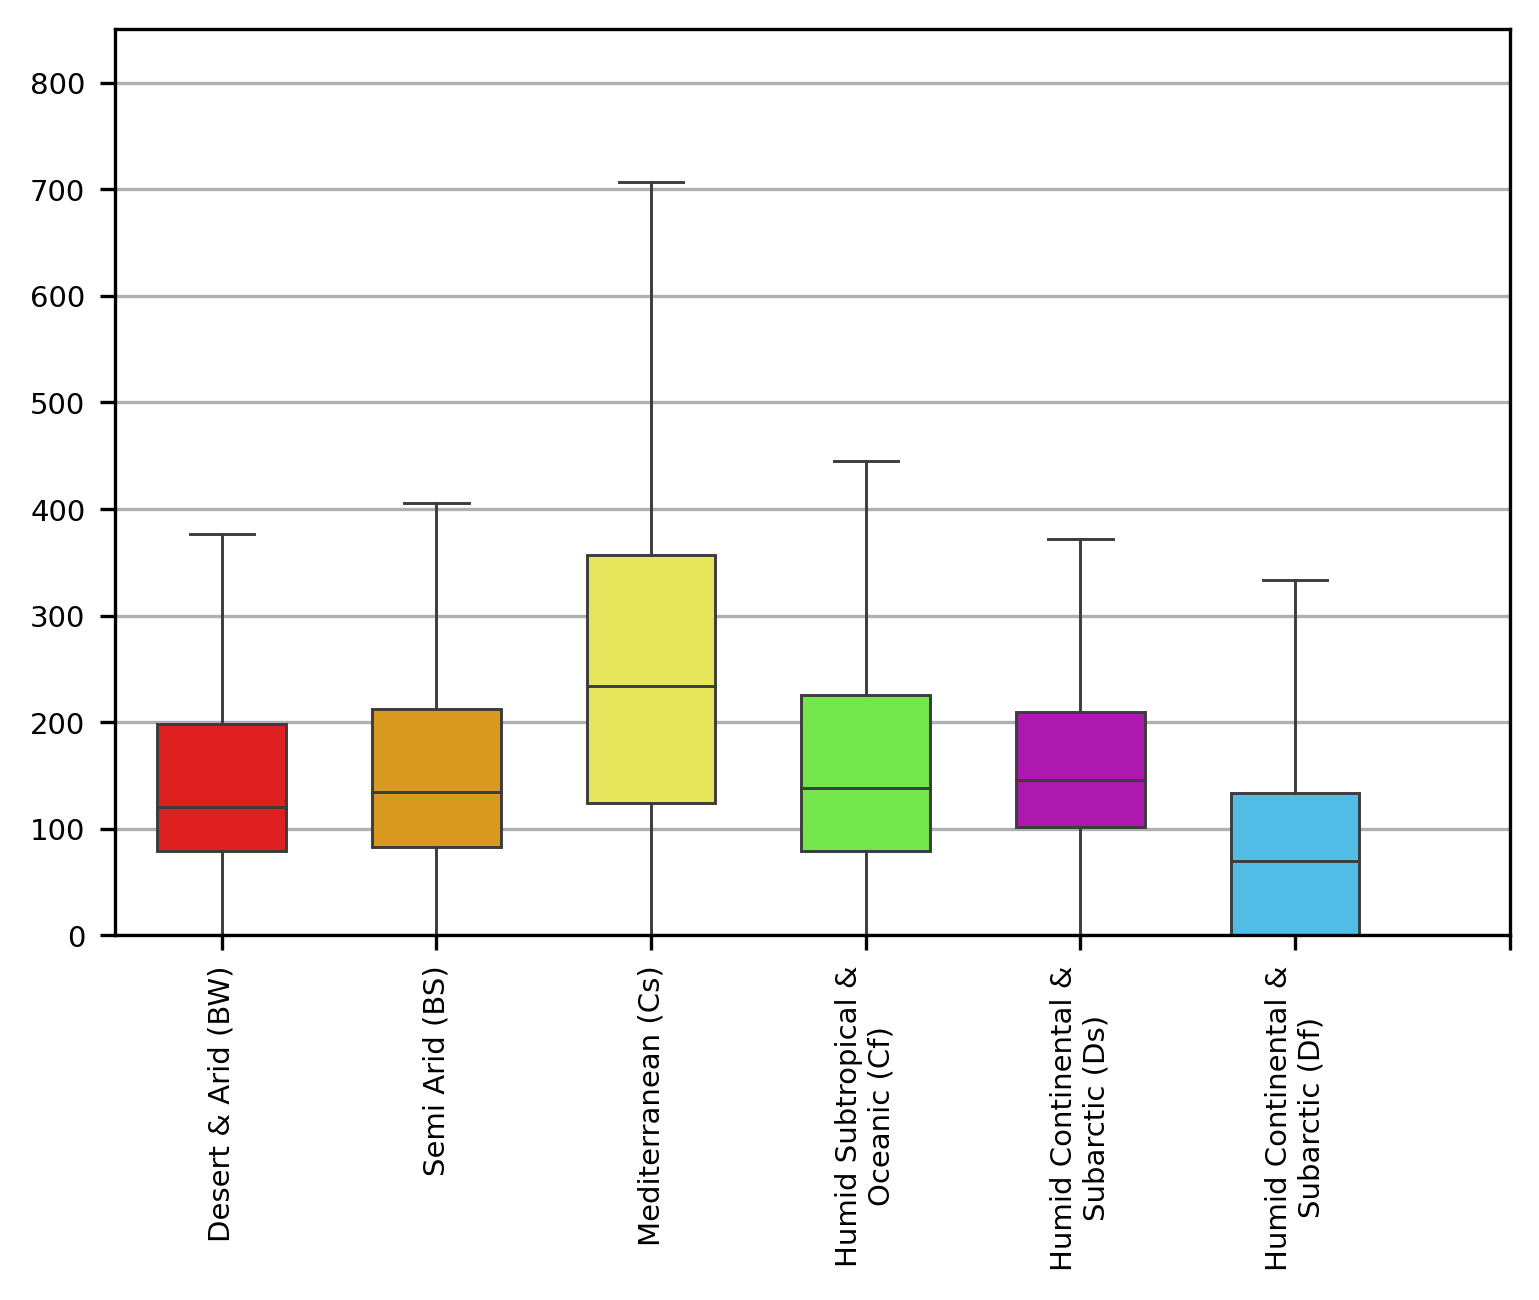

In [ ]:
# set font size
#plt.rc('xtick', labelsize=16) 
#plt.rc('ytick', labelsize=16) 

# set figure size
f, ax = plt.subplots(figsize=(6, 4), dpi=300) 

sns.boxplot(x="Koppen_Together", y="Srock", data=df_Koppen, width=.6, linewidth = .7, palette=aesthetics['color'],whis = 1.5, showfliers = False)
#sns.boxplot(x="Koppen_Together", y="Srock", data=plotdf, width=.6,whis = 0, showfliers = False)
# Tweak the visual presentation
plt.xticks(np.arange(0, 7, step=1), labels = aesthetics['name'],rotation = 'vertical') # rotation='25', ha="right"
ax.yaxis.grid(True)
#ax.set_title('Köppen Climate Type')
ax.set_axisbelow(True)
#ax.set_xlabel(labels)
ax.set_ylim(0, 850)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("koppen_boxes.pdf", transparent=True, bbox_inches='tight')
files.download("koppen_boxes.pdf") 

In [ ]:
lcoi = ['Evergreen Needleleaf\nForests','Evergreen Broadleaf\nForests','Deciduous Needleleaf\nForests','Deciduous Broadleaf\nForests','Mixed Forests','Closed Shrublands','Open Shrublands','Woody Savannas','Savannas','Shrubland\n(<2m Height)']
qgis_colors = ['#f8de85', '#FAC13E','#a5537f','#a52653','#c04a02','#A4B381','#52B33F','#74B3B8','#B183B8','#7846A8']
landcoverList = ['Evergreen Needleleaf\nForests', 'Evergreen Broadleaf\nForests', 'Deciduous Needleleaf\nForests', 'Deciduous Broadleaf\nForests', 'Mixed Forests', 'Closed Shrublands', 'Open Shrublands', 'Woody Savannas', 'Savannas', 'Shrubland (<2m Height)', 'Permanent Wetlands', 'Croplands', 'Urban and Built-up Lands', 'Cropland/Natural Vegetation Mosaics', 'Permanent Snow and Ice', 'Barren', 'Water Bodies']
land_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

land_aes = pd.DataFrame()
land_aes['name'] = lcoi
land_aes['number'] = land_numbers
land_aes['color'] = qgis_colors

In [ ]:
# Filter Koppen data and aesthetics by group for plotting:
landcover_ids = df_landcover['Landcover'].unique()
land_aesthetics = land_aes[land_aes.number.isin(landcover_ids)]
land_aesthetics

,name,number,color
0,Evergreen Needleleaf\nForests,1,#f8de85
1,Evergreen Broadleaf\nForests,2,#FAC13E
3,Deciduous Broadleaf\nForests,4,#a52653
4,Mixed Forests,5,#c04a02
5,Closed Shrublands,6,#A4B381
6,Open Shrublands,7,#52B33F
7,Woody Savannas,8,#74B3B8
8,Savannas,9,#B183B8
9,Shrubland\n(<2m Height),10,#7846A8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

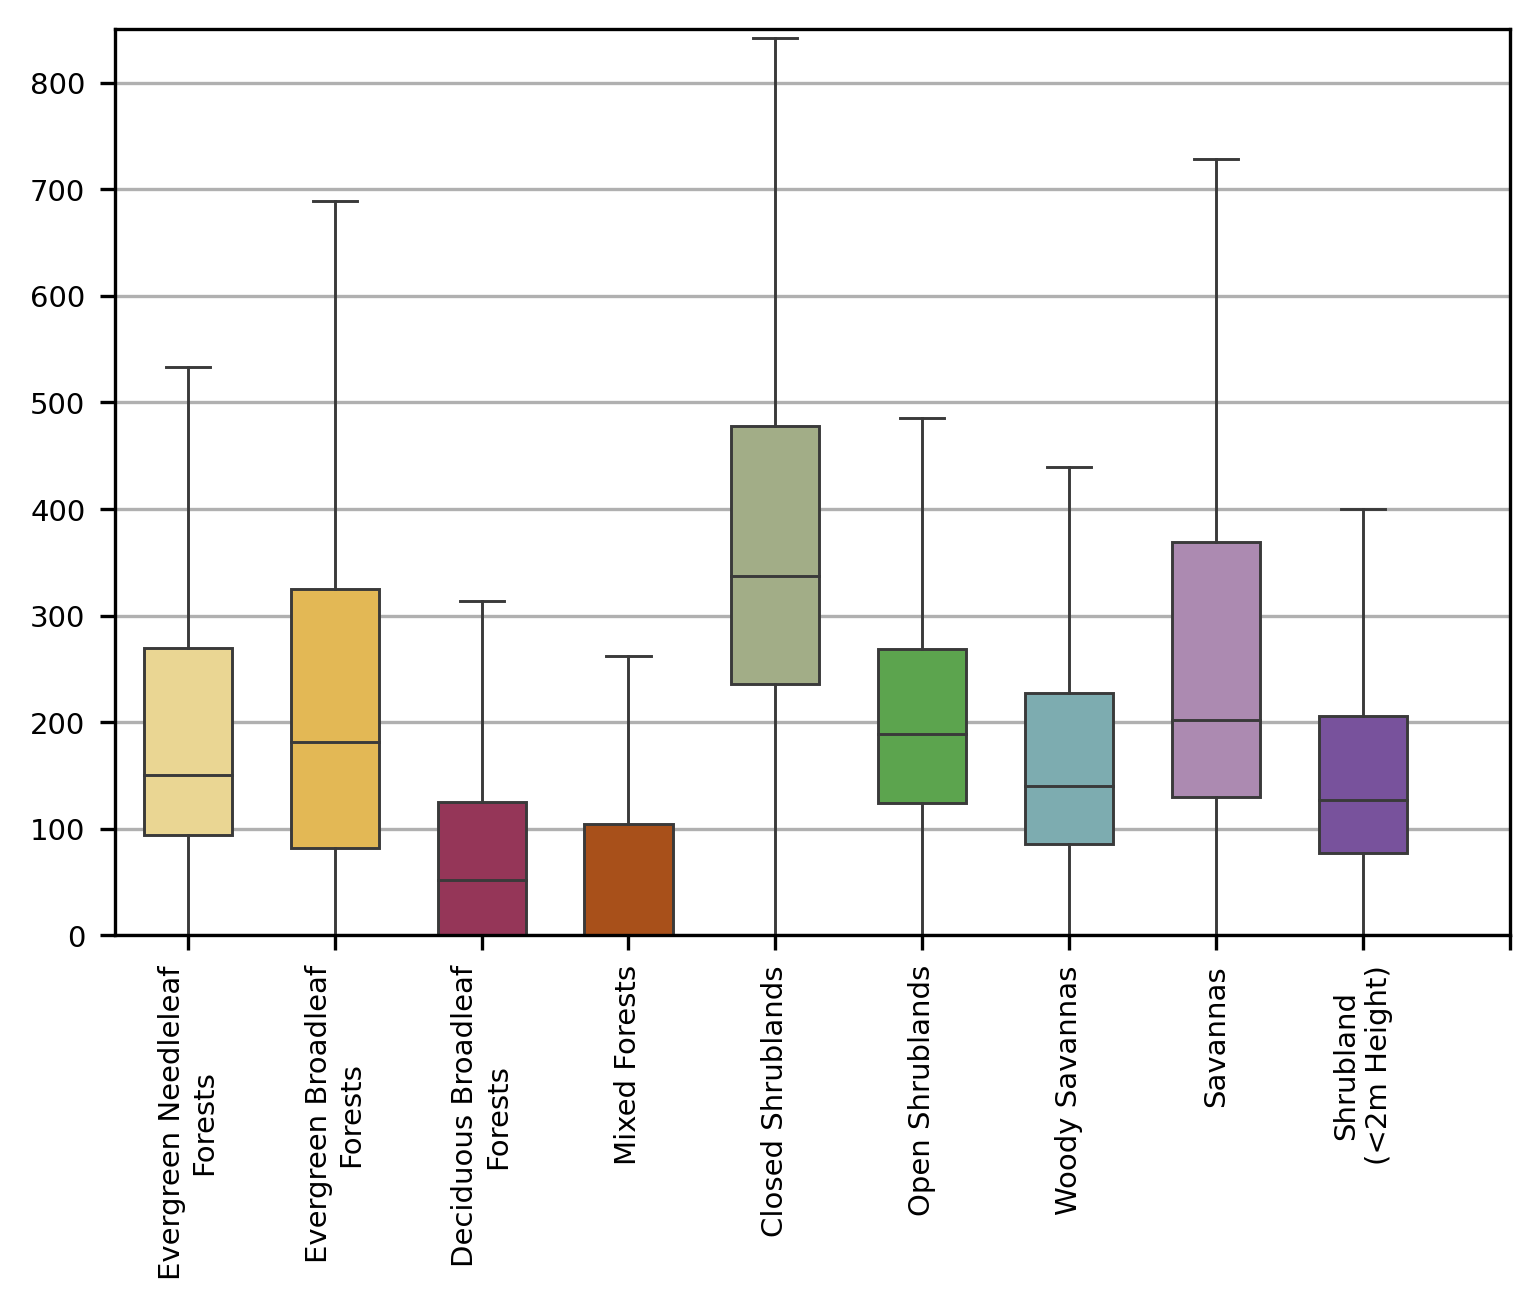

In [ ]:

# Set fig size
f, ax = plt.subplots(figsize=(6, 4),dpi=300)

sns.boxplot(x="Landcover", y="Srock", data=df_landcover, width=.6, linewidth = .7, palette = land_aesthetics['color'], whis = 1.5, showfliers = False)
plt.xticks(np.arange(0, 10, step=1), labels = land_aesthetics['name'], rotation = 'vertical') # rotation='25', ha="right"


# Tweak the visual presentation
plt.xticks(rotation='vertical');
ax.set_axisbelow(True)
#ax.set_title('Biome')
ax.set_xlabel("")
ax.set_ylabel("")
ax.yaxis.grid(True)
ax.set_ylim(0, 850)
#ax.set_ylabel('$S_{bedrock}$ (mm)')

# Uncomment to download fig:
plt.rcParams['pdf.fonttype'] = 42
plt.savefig("biome_boxes.pdf", transparent=True, bbox_inches='tight')
files.download("biome_boxes.pdf") 


**ED Table 1: Joint koppen and biome groups**

In [ ]:
df_combined = df_Koppen.copy()

# Get rid of landcover groups that were processed for df_Landcover
df_combined = df_combined[df_combined['Landcover'] < 11]
df_combined = df_combined[df_combined['Landcover'] > 0]
df_combined = df_combined[df_combined['Landcover'] != 3]

In [ ]:
df_median = df_combined.groupby(["Landcover","Koppen"]).median().reset_index()
df_median['Median'] = df_median['Srock']
del df_median['Srock']

df_mean = df_combined.groupby(["Landcover","Koppen"])['Srock'].mean().reset_index()
df_mean['Mean'] = df_mean['Srock']
del df_mean['Srock']

df_std = df_combined.groupby(["Landcover","Koppen"])['Srock'].std().reset_index()
df_std['Stdev'] = df_std['Srock']
del df_std['Srock']

# Area sum
df_area = df_combined.groupby(["Landcover","Koppen"])['Area_km2'].sum().reset_index()

## Combine into one
df_stats = pd.DataFrame()
df_stats['Koppen'] = df_median['Koppen']
df_stats['Landcover'] = df_median['Landcover']
df_stats['Median'] = df_median['Median']
df_stats['Mean'] = df_mean['Mean']
df_stats['Stdev'] = df_std['Stdev']
df_stats['Area'] = df_area['Area_km2']

df_stats.head()

,Koppen,Landcover,Median,Mean,Stdev,Area
0,4,1,1243.9074,1256.6669,106.1217,2.0196
1,5,1,305.5956,307.6959,74.7201,140.4730
2,6,1,1258.5907,1239.7315,213.7745,135.0306
3,7,1,168.5543,224.7041,220.2505,2199.5448
4,8,1,366.8857,397.7428,158.7262,9954.0365


In [ ]:
# Merge with labels
## Join with aesthetics df to attach names for koppen and landcover types
df_labeled = df_stats.merge(KoppenColors, how = 'left', left_on = 'Koppen', right_on = 'number')
df_labeled = df_labeled.merge(land_aes, how = 'left', left_on = 'Landcover', right_on = 'number')
df_labeled['Koppen_Name'] = df_labeled['name_x']
df_labeled['Landcover_Name'] = df_labeled['name_y']
df_labeled = df_labeled.drop(columns=['color_x', 'color_y','number_x','number_y', 'name_x','name_y'])
df_labeled

,Koppen,Landcover,Median,Mean,Stdev,Area,Koppen_Name,Landcover_Name
0,4,1,1243.9074,1256.6669,106.1217,2.0196,Desert & Arid (BW),Evergreen Needleleaf\nForests
1,5,1,305.5956,307.6959,74.7201,140.4730,Arid (BWk),Evergreen Needleleaf\nForests
2,6,1,1258.5907,1239.7315,213.7745,135.0306,Semi Arid (BS),Evergreen Needleleaf\nForests
3,7,1,168.5543,224.7041,220.2505,2199.5448,Semi Arid (BSk),Evergreen Needleleaf\nForests
4,8,1,366.8857,397.7428,158.7262,9954.0365,Mediterranean (Cs),Evergreen Needleleaf\nForests
...,...,...,...,...,...,...,...,...
98,18,10,132.8279,149.4736,104.9434,24719.1910,Humid Continental (Dsb),Shrubland\n(<2m Height)
99,19,10,157.4928,154.4441,74.8173,167.9586,Subarctic (Dsc),Shrubland\n(<2m Height)
100,25,10,157.1655,168.1793,84.1041,5288.4039,Humid Continental &\nSubarctic (Df),Shrubland\n(<2m Height)
101,26,10,107.7043,116.1909,77.8736,55507.0385,Humid Continental (Dfb),Shrubland\n(<2m Height)


In [ ]:
# Write the DataFrames to CSV files.
with open('/content/drive/MyDrive/joint_distribution_stats.csv', 'w') as f:
  df_labeled.to_csv(f)

**Statistical tests on Koppen and biome groups (Kruskal and Dunn's test p-values**

In [ ]:
## KOPPEN KRUSKAL TEST
subset4 = df_Koppen[df_Koppen['Koppen'] == 4]
kop4 = subset4['Srock'].dropna()

subset6 = df_Koppen[df_Koppen['Koppen'] == 6]
kop6 = subset6['Srock'].dropna()

subset8 = df_Koppen[df_Koppen['Koppen'] == 8]
kop8 = subset8['Srock'].dropna()

subset14 = df_Koppen[df_Koppen['Koppen'] == 14]
kop14 = subset14['Srock'].dropna()

subset17 = df_Koppen[df_Koppen['Koppen'] == 17]
kop17 = subset17['Srock'].dropna()

subset25 = df_Koppen[df_Koppen['Koppen'] == 25]
kop25 = subset25['Srock'].dropna()

data = [kop4, kop6, kop8, kop14, kop17, kop25]
stats.kruskal(kop4, kop6, kop8, kop14, kop17, kop25)

KruskalResult(statistic=367276.55880725855, pvalue=0.0)

In [ ]:
## KOPPEN KRUSKAL TEST
subset4 = df_landcover[df_landcover['Landcover'] == 1]
kop1 = subset4['Srock'].dropna()

subset6 = df_landcover[df_landcover['Landcover'] == 2]
kop2 = subset6['Srock'].dropna()

subset8 = df_landcover[df_landcover['Landcover'] == 4]
kop4 = subset8['Srock'].dropna()

subset14 = df_landcover[df_landcover['Landcover'] == 5]
kop5 = subset14['Srock'].dropna()

subset17 = df_landcover[df_landcover['Landcover'] == 6]
kop6 = subset17['Srock'].dropna()

subset25 = df_landcover[df_landcover['Landcover'] == 7]
kop7 = subset25['Srock'].dropna()

subset8 = df_landcover[df_landcover['Landcover'] == 8]
kop8 = subset8['Srock'].dropna()

subset14 = df_landcover[df_landcover['Landcover'] == 9]
kop9 = subset14['Srock'].dropna()

subset17 = df_landcover[df_landcover['Landcover'] == 10]
kop10 = subset17['Srock'].dropna()

data = [kop1, kop2, kop4, kop5, kop6, kop7, kop8, kop9, kop10]
stats.kruskal(kop1, kop2, kop4, kop5, kop6, kop7, kop8, kop9, kop10)

KruskalResult(statistic=812445.0514258713, pvalue=0.0)

In [ ]:
import scikit_posthocs as sp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
koppen_dunn = sp.posthoc_dunn(df_Koppen, val_col='Srock', group_col='Koppen_Together', p_adjust=None, sort=True)
landcover_dunn = sp.posthoc_dunn(df_landcover, val_col='Srock', group_col='Landcover', p_adjust=None, sort=True)

In [ ]:
koppen_dunn

,4,6,8,14,17,25
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
14,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
17,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
25,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [ ]:
landcover_dunn

,1,2,4,5,6,7,8,9,10
1,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [ ]:
# Write the DataFrame to CSV file.
with open('/content/drive/MyDrive/Dunn_Koppen.csv', 'w') as f:
  koppen_dunn.to_csv(f)

In [ ]:
with open('/content/drive/MyDrive/Dunn_Landcover.csv', 'w') as f:
  landcover_dunn.to_csv(f)

## **5. Bedrock water use volume and spatial extent statistics** 

*Note that the following two sections (sections 6 and 7) rely on code in this section. Please run all 3 sections together for best results.*

In [ ]:
# Assets for every year Dbedrock
drock04 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2004')
drock05 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2005')
drock06 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2006')
drock07 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2007')
drock08 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2008')
drock09 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2009')
drock10 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2010')
drock11 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2011')
drock12 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2012')
drock13 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2013')
drock14 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2014')
drock15 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2015')
drock16 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2016')
drock17 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2017')

listyears = [drock04, drock05, drock06, drock07, drock08, drock09, drock10, drock11, drock12, drock13, drock14, drock15, drock16, drock17]


Assemble areas calculated with conservative thresholding and upscaling approach to 500m:

In [ ]:
## Conservative masking layers using thresholding and 500 m scaling
woodveg_x_shallowbedrock = ee.Image('users/ericamccormick/20_RockMoisture/masks/woodyVeg_x_shallowBedrock')
woodyveg = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_woodyVeg')
shallowbedrock = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_shallowBedrock')
blankconus= ee.Image(1).clip(conus.geometry())

woodveg_x_shallowbedrock_Area = woodveg_x_shallowbedrock.gt(0).multiply(ee.Image.pixelArea())
woodyveg_AREA = woodyveg.gt(0).multiply(ee.Image.pixelArea())
shallowbedrock_AREA = shallowbedrock.gt(0).multiply(ee.Image.pixelArea())
blankconus_AREA = ee.Image(1).clip(conus.geometry()).multiply(ee.Image.pixelArea())

Calculate areas using nearest neighbor, non-conservative approach:

In [ ]:
## Sort USGS landcover by time in reverse to isolate most recent image. Isolate landcover band 
USGS_landcover = ee.ImageCollection("USGS/NLCD")
landsort = USGS_landcover.sort('system:time_start', False) #sort backcwards to get most recent image
landsort = landsort.first() # make sure to get just first image
img1 = landsort.select('landcover') # select landcover band

def getFinal(depth):
  ## Combine paralithic, densic and lithic bedrock into one raster with 1's for every pixel greater than depth in cm
  m = paralithic.select('b1').lt(depth)
  m1 = densic.select('b1').lt(depth)
  m2 = lithic.select('b1').lt(depth)
  
  m3 = m.add(m1).add(m2).gt(0) #m3 = combined densic and lithic lowerthan(depth)

  # The evergreen, deciduous, and mixed forest values are 41,42,43
  # The shrub value is 52

  ## Get shrub at bedrock.lt(depth): 
  shrub = img1.eq(52) #mask to get all values = 52
  temp = shrub.multiply(m3).gt(0) # multiply by bedrock so anywhere where bedrock >depth turns to 0.
  shrub_final = temp.multiply(ee.Image(2)) # set shrubs as value 2, everything else 0

  ## Get forested at bedrock.lt(depth):
  # get classes so forested is 0s with 1s where values 41,42,43. Use function 'reclassify'
  forested = img1.remap([41,42,43],[1,1,1],0) #forested.remap([from],[to],defaultVal) , defaultval sets everything else to zerofore
  # restrict forested to places with bedrock.lt(depth)
  forested_final = forested.multiply(m3)

  ## add forested_final and shrub_final:
  final = ee.Image(0).add(forested_final).add(shrub_final)
  return forested, shrub, forested_final, shrub_final, final

forested, shrub, forested_final, shrub_final, final = getFinal(150)
woody = forested.add(shrub.gt(0))
woody_final = forested_final.add(shrub_final.gt(0))

Functions used in calculating statistics

In [ ]:
# Calculate relative area with CONUS
def relArea(numerator,denominator, num_band, den_band):
  countnum = numerator.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })

  countden = denominator.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })

  areanum = countnum.get(num_band).getInfo()
  areaden = countden.get(den_band).getInfo()

  percent = (areanum/areaden)*100
  return percent

## **6. ED8** 

Doubling of Ssoil reduces the area where bedrock water is required to explain ET by approximately ##%

In [ ]:
Ssoil = ee.Image('users/ericamccormick/20_RockMoisture/products/gNATSGO/Ssoil_500m')

Sbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Sbedrock')
Sbedrock_2xssoil = Sbedrock.subtract(Ssoil)

medianDbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_median')
Dbedrock_2xssoil = medianDbedrock.subtract(Ssoil)

# Reducer function
def singleReducer(product,band_name):
  amount = product.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })
  result = amount.get(band_name).getInfo()
  return result

# Area of Sbedrock > 0 in CONUS
Sbedrock_pos = Sbedrock.gt(0).multiply(ee.Image.pixelArea())
normal_Sbedrock_area = singleReducer(Sbedrock_pos, 'S_R_snow_corr')

# Area of Sbedrock > 0 for Ssoilx2 in CONUS
Sbedrockx2_pos = Sbedrock_2xssoil.gt(0).multiply(ee.Image.pixelArea())
x2_Sbedrock_area = singleReducer(Sbedrockx2_pos, 'S_R_snow_corr')

# Area of median Dbedrock > 0 in CONUS
Dbedrock_pos = medianDbedrock.gt(0).multiply(ee.Image.pixelArea())
normal_Dbedrock_area = singleReducer(Dbedrock_pos, 'b1')

# Area of median Dbedrock > 0 for Ssoilx2 in CONUS
Dbedrockx2_pos = Dbedrock_2xssoil.gt(0).multiply(ee.Image.pixelArea())
normal_Dbedrockx2_area = singleReducer(Dbedrockx2_pos, 'b1')

print('Area of Sbedrock > 0:',normal_Sbedrock_area,'m^2')
print('Area of Sbedrock > 0 (Ssoilx2):',x2_Sbedrock_area,'m^2\n')
print('Area of median Dbedrock > 0:',normal_Dbedrock_area,'m^2')
print('Area of median Dbedrock > 0 (Ssoilx2):',normal_Dbedrockx2_area,'m^2')


Area of Sbedrock > 0: 682882047610.0922 m^2
Area of Sbedrock > 0 (Ssoilx2): 446541011510.8516 m^2

Area of median Dbedrock > 0: 464109701870.60724 m^2
Area of median Dbedrock > 0 (Ssoilx2): 203791296585.7501 m^2


In [ ]:
print('Reduction in Dbedrock area:',round(((normal_Dbedrock_area - normal_Dbedrockx2_area)/normal_Dbedrock_area)*100,2),'%')
print('Reduction in Sbedrock area:',round(((normal_Sbedrock_area - x2_Sbedrock_area)/normal_Sbedrock_area)*100,2),'%')

Reduction in Dbedrock area: 56.09 %
Reduction in Sbedrock area: 34.61 %


What is the area of CONUS where Sbedrock > 0?

In [ ]:
Sbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Sbedrock')
positive = Sbedrock.gt(0).clip(conus.geometry())

#Multiply by area, converted from m^2 to mm^2
posarea = positive.multiply(ee.Image.pixelArea().multiply(1000000))
amount = posarea.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })
volume = amount.get('S_R_snow_corr').getInfo()
print(round(volume),'mm^2')
print(round(volume/1e6),'m^2')
print(round(volume/1e+12),'km^2')

682882047610091264 mm^2
682882047610 m^2
682882 km^2


What is the area of CA where Dbedrock > 0?

In [ ]:
medianDbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_median')
posarea_volume = medianDbedrock.gt(0).clip(ca.geometry())

#Multiply by area, converted from m^2 to mm^2
posarea_volume = posarea_volume.multiply(ee.Image.pixelArea().multiply(1000000))
amount = posarea_volume.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': ca.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })
volume = amount.get('b1').getInfo()
print(round(volume),'mm^2')
print(round(volume/1e6),'m^2')
print(round(volume//1.233e+12),'m=acre-feet')

89094199656701808 mm^2
89094199657 m^2
72258 m=acre-feet


CA volume of bedrock water transpired annually compared to man-made reservoir storage

In [ ]:
listyears = [drock04, drock05, drock06, drock07, drock08, drock09, drock10, drock11, drock12, drock13, drock14, drock15, drock16, drock17]

print('Volume of bedrock water supply transpired annually by woody veg in CA (mm^3)')
water = []
for i in listyears:
  #Make sure negative values are 0 and it is clipped to CA
  posarea_volume = i.clip(ca.geometry()).multiply(i.gt(0).clip(ca.geometry()))

  #Multiply by area, converted from m^2 to mm^2
  posarea_volume = posarea_volume.multiply(ee.Image.pixelArea().multiply(1000000))
  amount = posarea_volume.reduceRegion(**{
    'reducer': ee.Reducer.sum(),
    'geometry': ca.geometry(), 
    'scale': 500,
    'maxPixels': 1e15
    })
  volume = amount.get('b1').getInfo()
  print(round(volume))
  water.append(volume)

Volume of bedrock water supply transpired annually by woody veg in CA (mm^3)
19255374936829558784
13495734051435810816
18002028473528006656
17227334612290543616
20783648212278874112
18226072081587699712
14542860041463586816
12762348676912390144
17888091703336679424
16257816332388616192
16897190140763877376
17824517081405693952
19014649756089556992
20237199337106108416



[Average volume of water stored in all CA reservoirs](https://info.water.ca.gov/cgi-progs/reservoirs/RES): 714200 acre-feet

In [ ]:
# conversion of mm^3 to acre-feet
vol = pd.DataFrame()
vol['mm3'] = water
vol['acrefeet'] = vol['mm3'] /1.233e+12

avg_vol_acrefeet = vol['acrefeet'].mean()
print('Average volume of bedrock water transpired annually by veg in CA:', round(avg_vol_acrefeet),'acre-feet')
print('Volume of bedrock water transpired annually by veg in CA is between', round(vol['acrefeet'].min()),'and',round(vol['acrefeet'].max()),'acre-feet')
#print('Volume of bedrock water transpired annually by veg in CA is', round(vol['acrefeet'].min()/714200,2),'to',round(vol['acrefeet'].max()/714200,2), 'the amount of water stored in reservoirs')
vol.head()


Average volume of bedrock water transpired annually by veg in CA: 14043266 acre-feet
Volume of bedrock water transpired annually by veg in CA is between 10350648 and 16856162 acre-feet
Volume of bedrock water transpired annually by veg in CA is 14.49 to 23.6 the amount of water stored in reservoirs


,mm3,acrefeet
0,19255374936829558784.0000,15616686.8912
1,13495734051435810816.0000,10945445.2972
2,18002028473528006656.0000,14600185.2989
3,17227334612290543616.0000,13971885.3303
4,20783648212278874112.0000,16856162.3782


44-55% of wooded land area in CONUS is characterized as woody veg with shallow bedrock

In [ ]:
d = relArea(woodveg_x_shallowbedrock_Area.clip(conus.geometry()), woodyveg_AREA.clip(conus.geometry()), 'b1', 'landcover')
d2 = relArea(woody_final.multiply(ee.Image.pixelArea()).clip(conus.geometry()), woody.multiply(ee.Image.pixelArea()).clip(conus.geometry()), 'remapped', 'remapped')

In [ ]:
print('Using conservative thresholding to determine relevant extents,', round(d,2), '% of woody veg in CONUS that overlies shallow bedrock')
print('Using nearets neighbor upscaling,',round(d2,2),'% of woody veg in CONUS that overlies shallow bedrock')

Using conservative thresholding to determine relevant extents, 44.2 % of woody veg in CONUS that overlies shallow bedrock
Using nearets neighbor upscaling, 55.76 % of woody veg in CONUS that overlies shallow bedrock


CA and TX, where at least 28-30% and 5-10% of total land areas respecitvely withdraw bedrock water for transpiration in a given year

In [ ]:
def getPositiveAreaCA(years):
  areas = []
  for i in years:
  #blankconus = blankconus.gt(0).clip(conus.geometry()).multiply(ee.Image.pixelArea())
    posarea = i.clip(ca.geometry()).gt(0).multiply(ee.Image.pixelArea())
    area = relArea(posarea, blankconus.clip(ca.geometry()), 'b1','constant')
    area = float(area)
    areas.append(area)
  return areas

def getPositiveAreaTX(years):
  areas = []
  for i in years:
  #blankconus = blankconus.gt(0).clip(conus.geometry()).multiply(ee.Image.pixelArea())
    posarea = i.clip(tx.geometry()).gt(0).multiply(ee.Image.pixelArea())
    area = relArea(posarea, blankconus.clip(tx.geometry()), 'b1','constant')
    area = float(area)
    areas.append(area)
  return areas

  
tx_areas = getPositiveAreaTX(listyears)
ca_areas = getPositiveAreaCA(listyears)


In [ ]:
print('Area of TX each year with positive Dbedrock:')

Area of TX each year with positive Dbedrock:


In [ ]:
blankconus = blankconus.gt(0).clip(conus.geometry()).multiply(ee.Image.pixelArea())
posarea = drock04.clip(tx.geometry()).gt(0).multiply(ee.Image.pixelArea())
area = relArea(posarea, blankconus.clip(tx.geometry()), 'b1','constant')
area

4.753615335147264

In [ ]:
for i in listyears:
  areas = []
  blanktx = blankconus.gt(0).clip(tx.geometry()).multiply(ee.Image.pixelArea())
  posarea = i.clip(tx.geometry()).gt(0).multiply(ee.Image.pixelArea())
  area = relArea(posarea, blanktx, 'b1','constant')
  print(area)
  areas.append(area)

4.753615335147264
5.7600210145970925
5.931898219731429
3.524965130222577
5.910496803077736
5.668920677201892
5.511239887231846
5.920365838151707
5.586064110380709
5.49208718355335
5.054234023845649
5.317599868342313
5.06184889083149
5.530414462403313


In [ ]:
print('Area of CA each year with positive Dbedrock:')

In [ ]:
for i in listyears:
  areas = []
  blankca = blankconus.gt(0).clip(ca.geometry()).multiply(ee.Image.pixelArea())
  posarea = i.clip(ca.geometry()).gt(0).multiply(ee.Image.pixelArea())
  area = relArea(posarea, blankca, 'b1','constant')
  print(area)
  areas.append(area)

21.61501047230891
21.677277350369963
21.72818537560118
21.34880213559661
21.862986499376515
21.98613231877858
21.85938425837426
21.427262129640653
21.73665925650015
21.52681685547096
21.279612098959152
21.182023916166198
22.09084278610996
22.116633864834608


## **7. Shallow bedrock / woody vegetation statistics**

Densic, lithic, and paralithic bedrock from gNATSGO database (Soil Survey Staff, 2019). Landcover types  from USGS: NLCD (Yang and Xian, 2018).


In [ ]:
  ## Sort USGS landcover by time in reverse to isolate most recent image. Isolate landcover band 
USGS_landcover = ee.ImageCollection("USGS/NLCD")
landsort = USGS_landcover.sort('system:time_start', False) #sort backcwards to get most recent image
landsort = landsort.first() # make sure to get just first image
img1 = landsort.select('landcover') # select landcover band

Function to get 5 images based on a given depth to bedrock (depth). The five images are:


*   forested: the original extent of forest cover
*   shrub: the original extent of shrub cover
*   forested_final: the extent of forest overlying soils of thickness <= depth
*   shrub_final: the extent of shrub cover overlying soils of thickness <= depth
*   final: the combined extent of forest and shrubland overlying soils of thickness <= depth.

Throughout, forest is value =1 and shrub is value = 2.





In [ ]:
def getFinal(depth):
  ## Combine paralithic, densic and lithic bedrock into one raster with 1's for every pixel greater than depth in cm
  m = paralithic.select('b1').lt(depth)
  m1 = densic.select('b1').lt(depth)
  m2 = lithic.select('b1').lt(depth)
  
  m3 = m.add(m1).add(m2).gt(0) #m3 = combined densic and lithic lowerthan(depth)

  # The evergreen, deciduous, and mixed forest values are 41,42,43
  # The shrub value is 52

  ## Get shrub at bedrock.lt(depth): 
  shrub = img1.eq(52) #mask to get all values = 52
  temp = shrub.multiply(m3).gt(0) # multiply by bedrock so anywhere where bedrock >depth turns to 0.
  shrub_final = temp.multiply(ee.Image(2)) # set shrubs as value 2, everything else 0

  ## Get forested at bedrock.lt(depth):
  # get classes so forested is 0s with 1s where values 41,42,43. Use function 'reclassify'
  forested = img1.remap([41,42,43],[1,1,1],0) #forested.remap([from],[to],defaultVal) , defaultval sets everything else to zerofore
  # restrict forested to places with bedrock.lt(depth)
  forested_final = forested.multiply(m3)

  ## add forested_final and shrub_final:
  final = ee.Image(0).add(forested_final).add(shrub_final)
  return forested, shrub, forested_final, shrub_final, final

In [ ]:
## To visualize a layer, replace 'forested' with image of interest:
#Image(url = forested.clip(conus.geometry()).getThumbUrl({'min': 0, 'max': 100, 'dimensions': 512,
#
#                'palette': ['red', 'green','#c29776']}))

Function to extract the final calculation from an ee.Reducer:

In [ ]:
# Extract info from reduceRegion:
def extractReducer(ReducerResult):
  temp = ReducerResult.getInfo()
  temp = temp.values()
  temp = list(temp)
  for i in temp:
    temp = [int(i)]
    temp = temp[0]
  return temp

Function to calculate the area percentage of one group out of another group over the entire CONUS.

In [ ]:
# Calculate relative area with CONUS
def relArea(numerator,denominator,scale):
  countnum = numerator.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': scale,
  'maxPixels': 1e15
  })

  countden = denominator.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': conus.geometry(), 
  'scale': scale,
  'maxPixels': 1e15
  })

  areanum = extractReducer(countnum)
  areaden = extractReducer(countden)

  percent = (areanum/areaden)*100
  return percent


Function to get the percent of land area of forest and shrub overlying thin soils (given as a list (depth_toget)) out of the total area of forest and shrub in the continental US. Returns two lists with the percentages for forest and shrub. In order to get the percentages for TX and CA, change the geometry to 'ca' and 'tx' in the relArea function, above.

In [ ]:
def get_percent(depth_toget,scale):
  forest_result = ()
  shrub_result = ()
  vegtypes = ['forest','shrub']

  for depth in depth_toget:
    forested, shrub, forested_final, shrub_final, final = getFinal(depth)

    # Set all values greater than 0 to 1 and multiply by the pixel areas
    forested = forested.gt(0).multiply(ee.Image.pixelArea())
    shrub = shrub.gt(0).multiply(ee.Image.pixelArea())
    forested_final = forested_final.gt(0).multiply(ee.Image.pixelArea())
    shrub_final = shrub_final.gt(0).multiply(ee.Image.pixelArea())

    for i in vegtypes:
    # Assign images to use for forest or shrub:
      if i == 'forest':
        forest_percent = relArea(forested_final, forested, scale)

      elif i == 'shrub':
        shrub_percent = relArea(shrub_final, shrub, scale)

    # Make lists to return percentages for forest and shrub
    shrub_result = np.append(shrub_result, np.array(shrub_percent))
    forest_result = np.append(forest_result, np.array(forest_percent))

  return forest_result, shrub_result


Make a cumulative density function for the area of forest and shrubland overlying soils of varying thicknesses

In order to get the curves for Texas and California, change the geometry in the get_percent function and add to dataframe for plotting. Here, only plot for CONUS is shown. 

In [ ]:
depth_toget = [5, 10, 15, 20, 25, 30,35, 40, 45, 50, 60, 70,75,80,85,90,95,100,105,110,120,125,130,135,140,145,150]

df6 = pd.DataFrame()
df6['Forested_us'], df6['Shrub_us'] = get_percent(depth_toget,500)
df6['Depth'] = depth_toget

In [ ]:
df6.tail()

,Forested_us,Shrub_us,Depth
22,45.759190,55.683917,130
23,47.628473,56.551104,135
24,49.454519,57.386991,140
25,51.238171,58.192936,145
26,52.907328,58.972222,150


No handles with labels found to put in legend.


Text(190, 55, '59% of scrubland in the US\nis located where bedrock\nis encountered within\n150 cm of the surface')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


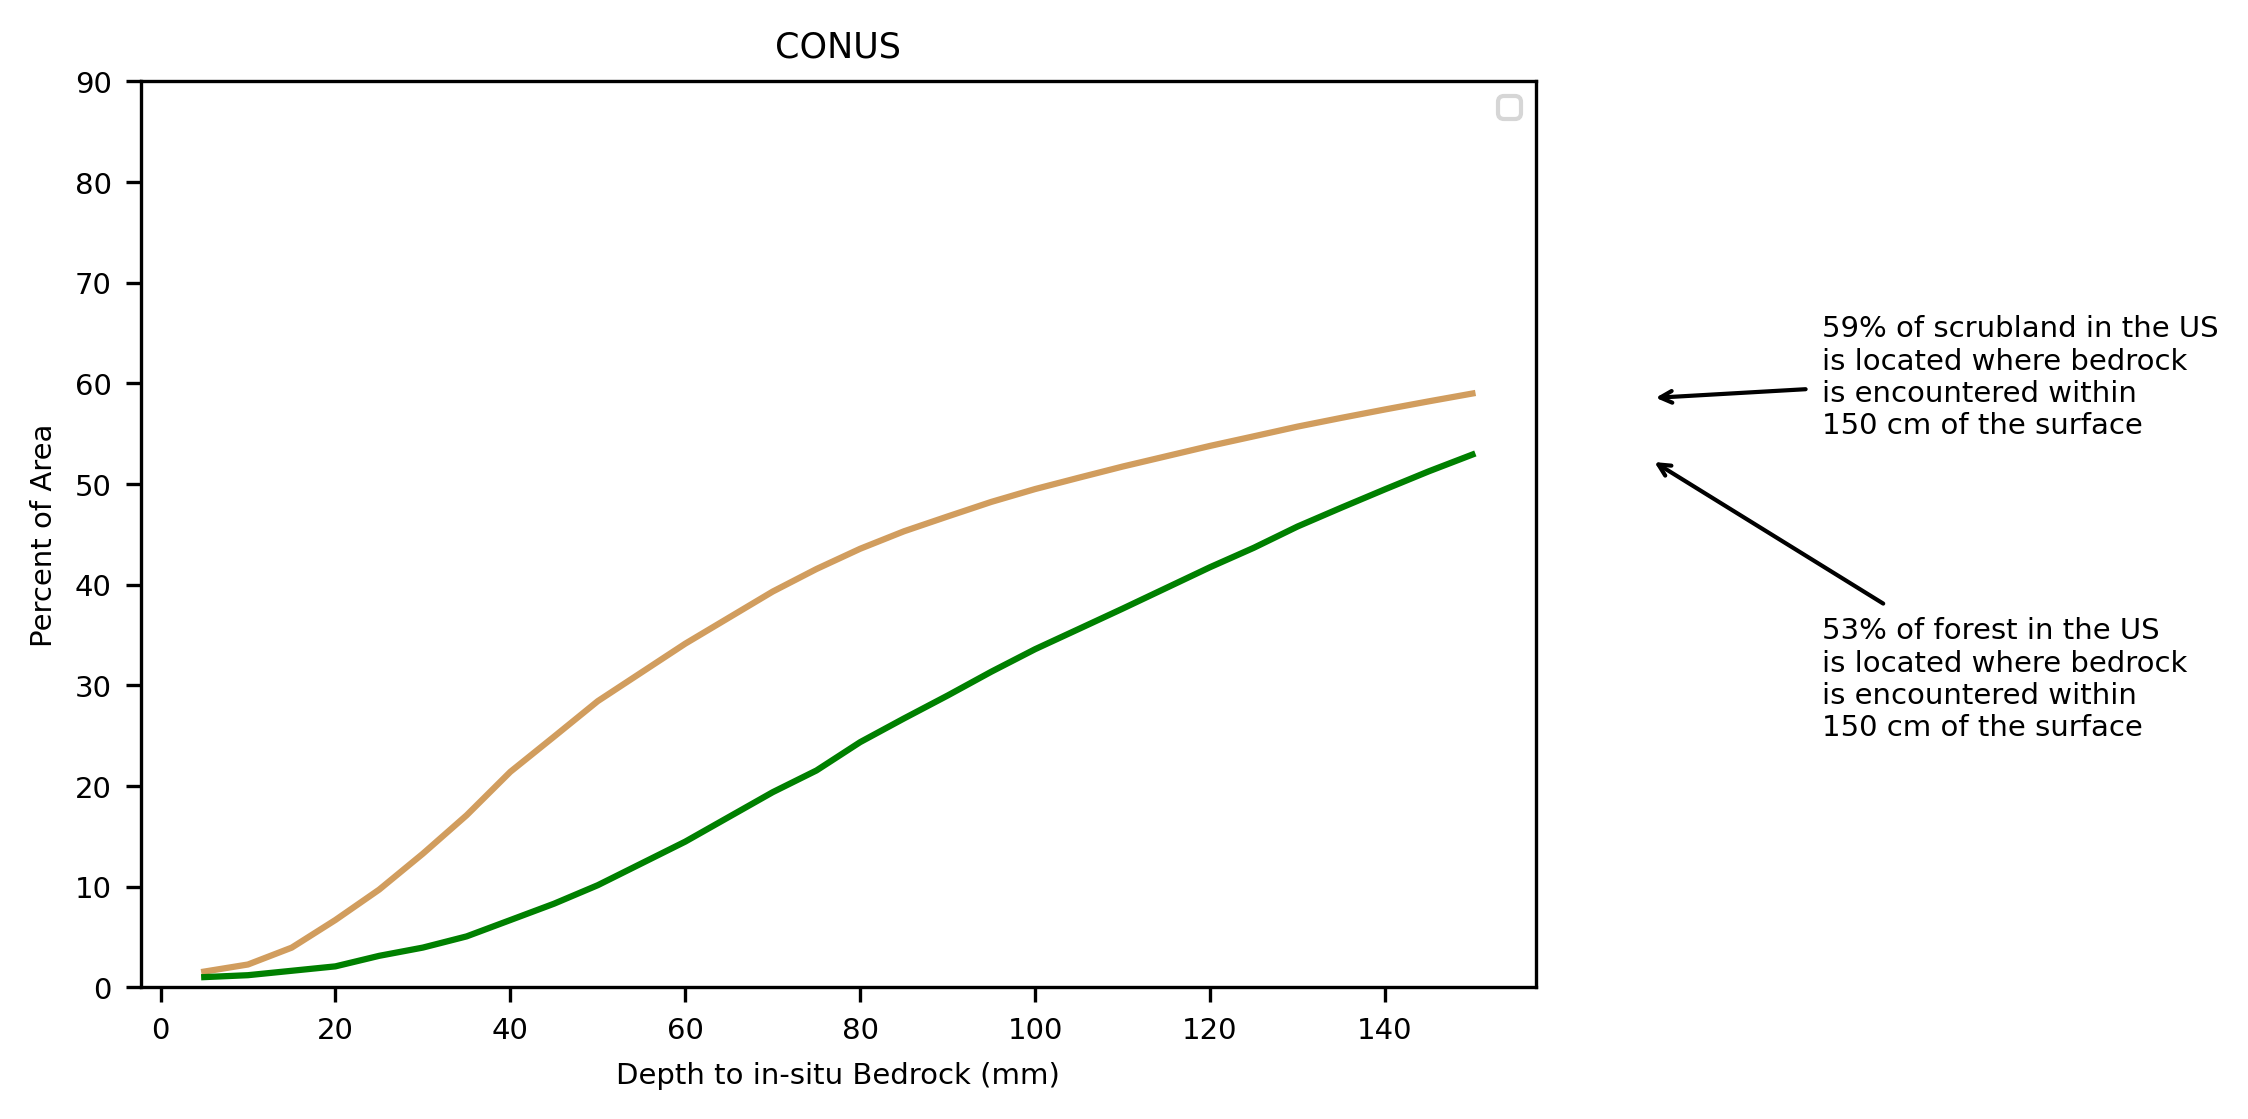

In [ ]:
plt.figure(dpi=300)

plt.plot(df6['Depth'],df6['Shrub_us'],color='#d19d5e')
plt.plot(df6['Depth'],df6['Forested_us'],color='green')
plt.ylim(0,90)
plt.title('CONUS')
plt.xlabel('Depth to in-situ Bedrock (mm)');
plt.ylabel('Percent of Area')
plt.legend(loc='best')

#plt.plot([10,150],[52.6,52.6],linewidth=2,linestyle = 'dashed',color='black')
#plt.plot([10,150],[59.5,59.5],linewidth=2,color='grey')

plt.annotate('53% of forest in the US\nis located where bedrock\nis encountered within\n150 cm of the surface', xy=(170, 52.6), xytext=(190, 25), arrowprops=dict(arrowstyle = "->",facecolor='black'), annotation_clip = False)
plt.annotate('59% of scrubland in the US\nis located where bedrock\nis encountered within\n150 cm of the surface', xy=(170, 58.5), xytext=(190, 55), arrowprops=dict(arrowstyle = "->",facecolor='black'), annotation_clip = False)
        
# Uncomment to save figure
#plt.savefig("forest_lines.pdf", transparent=True)
#files.download("forest_lines.pdf") 

## **8. ED4**

Calculate median $D_{bedrock,y}$

In [ ]:
Dbedrock_2004 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2004')
Dbedrock_2005= ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2005')
Dbedrock_2006 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2006')
Dbedrock_2007 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2007')
Dbedrock_2008 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2008')
Dbedrock_2009 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2009')
Dbedrock_2010 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2010')
Dbedrock_2011 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2011')
Dbedrock_2012 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2012')
Dbedrock_2013 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2013')
Dbedrock_2014 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2014')
Dbedrock_2015 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2015')
Dbedrock_2016 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2016')
Dbedrock_2017 = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_2017')

mask_reproj = ee.Image('users/ericamccormick/20_RockMoisture/masks/mask_reproj')

In [ ]:
# Combine images from each year into an image collection with all years
Dbedrock_all = ee.ImageCollection([Dbedrock_2004, Dbedrock_2005, Dbedrock_2006, Dbedrock_2007, Dbedrock_2008, Dbedrock_2009, Dbedrock_2010, Dbedrock_2011, Dbedrock_2012, Dbedrock_2013, Dbedrock_2014, Dbedrock_2015, Dbedrock_2016, Dbedrock_2017])

# Make sure it is masked by correct stuff
#(SEND MASK AS AN ASSET FROM COMPILED CODE 1 THEN RE-IMPORT HERE)
Dbedrock_all = Dbedrock_all

In [ ]:
# Get the mean of each cumulative annual precip
Dbedrock_median = Dbedrock_all.reduce(**{
    'reducer': ee.Reducer.median(),
  }).updateMask(mask_reproj)

Dbedrock_mean = Dbedrock_all.reduce(**{
    'reducer': ee.Reducer.mean(),
  }).updateMask(mask_reproj)

Dbedrock_stdev = Dbedrock_all.reduce(**{
    'reducer': ee.Reducer.stdDev(),
  }).updateMask(mask_reproj)

In [ ]:
## For Figure 1, find how many years a pixel has >0 Dbedrock for
def setBinary(image):
  temp = image.gt(0)
  return temp

Dbedrock_binary = Dbedrock_all.map(setBinary)

Dbedrock_count_years = Dbedrock_binary.reduce(**{
    'reducer': ee.Reducer.sum(),
  }).updateMask(mask_reproj)

In [ ]:
task_config = {
        'region': conus.geometry(),
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'Dbedrock_count_years', #change the name to reflect parameters
        'image': Dbedrock_count_years.clip(conus.geometry()).toDouble(),
        'description': 'Dbedrock_count_years',
        'scale': 500,
        'maxPixels': 10000000000000,
        'crs':'EPSG:4326'
    }


task=ee.batch.Export.image.toDrive(**task_config)
task.start()

First calculate mean annual water year precipitation (MAP) from 2003-2017 using PRISM dataset (Daly, 2008).

In [ ]:
## define function to take the annual sum of precipitation 
def annualSum(startyear,stopyear):
  start = str(startyear) +"-10-01"
  stop = str(stopyear)+"-09-30"
  prism = ee.ImageCollection('OREGONSTATE/PRISM/AN81d').select('ppt').filterDate(start, stop)
  MAP = prism.reduce(**{
    'reducer': ee.Reducer.sum(),
  })
  return MAP

In [ ]:
## get the sum of precipitation each year
MAP2004 = annualSum(2003,2004)
MAP2005 = annualSum(2004,2005)
MAP2006 = annualSum(2005,2006)
MAP2007 = annualSum(2006,2007)
MAP2008 = annualSum(2007,2008)
MAP2009 = annualSum(2008,2009)
MAP2010 = annualSum(2009,2010)
MAP2011 = annualSum(2010,2011)
MAP2012 = annualSum(2011,2012)
MAP2013 = annualSum(2012,2013)
MAP2014 = annualSum(2013,2014)
MAP2015 = annualSum(2014,2015)
MAP2016 = annualSum(2015,2016)
MAP2017 = annualSum(2016,2017)

In [ ]:
# Combine images from each year into an image collection with all years
MAP = ee.ImageCollection([MAP2004, MAP2005, MAP2006, MAP2007, MAP2008, MAP2009, MAP2010, MAP2011, MAP2012, MAP2013, MAP2014, MAP2015, MAP2016, MAP2017])

In [ ]:
# Get the mean of each cumulative annual precip
MAP_Mean = MAP.reduce(**{
    'reducer': ee.Reducer.mean(),
  })

Export to drive and as GEE asset

In [ ]:
# Export Image to Google Drive
to_export = MAP_Mean.clip(conus.geometry()).toDouble()

task_config = {
        'region': conus.geometry(),
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'MAP', #change the name to reflect parameters
        'image': to_export,
        'description': 'MAP',
        'scale': 500,
        'maxPixels': 10000000000000,
        'crs':'EPSG:4326'
    }


task=ee.batch.Export.image.toDrive(**task_config)
task.start()

In [ ]:
task_config = {
        'region': conus.geometry(),
        'image': MAP_Mean.clip(conus.geometry()),
        'description': 'MAP',
        'assetId' : 'users/ericamccormick/MAP',
        'scale': 500,
        'maxPixels': 10000000000000
    }

task=ee.batch.Export.image.toAsset(**task_config)
task.start()

In [ ]:
task_config = {
        'region': conus.geometry(),
        'image': MAP,
        'description': 'annual_wateryear_precip',
        'assetId' : 'users/ericamccormick/annual_wateryear_precip',
        'scale': 500,
        'maxPixels': 10000000000000
    }

task=ee.batch.Export.image.toAsset(**task_config)
task.start()

Calculate ratio of mean $D_{bedrock}$ and $S_{bedrock}$ with MAP

In [ ]:
MAP_percent_Dbedrock_median_zeros = Dbedrock_median_zeros.divide(MAP_Mean)

In [ ]:
# Calculate Sbedrock divided by MAP
Sbedrock_gt0 = Sbedrock.gt(0).multiply(Sbedrock)
ratio_StoMAP = Sbedrock_gt0.divide(MAP_Mean)

In [ ]:
# Export to drive
to_export =MAP_percent_Dbedrock_median_zeros.clip(conus.geometry())

task_config = {
        'region': conus.geometry(),
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'MAP_percent_Dbedrock_median_zeros', #change the name to reflect parameters
        'image': to_export,
        'description': 'MAP_percent_Dbedrock_median_zeros',
        'scale': 1000,
        'maxPixels': 10000000000000,
        'crs':'EPSG:4326'
    }


task=ee.batch.Export.image.toDrive(**task_config)
task.start()

## **9. Above-ground carbon statistics**

woody veg that withdraws bedrock water for ET on an annual basis (green in fig1) accounts for over 49% of CAs aboveground carbon stocks (490 Tg of carbon)

In [ ]:
ca_carbon = ee.Image('users/ericamccormick/aboveground_biomass_carbon_2010_scaled_CA') #Mg carbon /hectar
med_dbedrock = ee.Image('users/ericamccormick/20_RockMoisture/deficit/bedrock/Dbedrock_median')

carbon_Mg = ca_carbon.multiply(ee.Image.pixelArea()).divide(10000) #Mg carbon
tot_ca_carbon = carbon_Mg.reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': ca.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })
total = tot_ca_carbon.get('b1').getInfo()


pos_dbedrock_ca_carbon = carbon_Mg.updateMask(med_dbedrock.gt(0)).reduceRegion(**{
  'reducer': ee.Reducer.sum(),
  'geometry': ca.geometry(), 
  'scale': 500,
  'maxPixels': 1e15
  })
pos_dbedrock_carbon = pos_dbedrock_ca_carbon.get('b1').getInfo()

print(round((pos_dbedrock_carbon/total)*100),'% of CA above-ground carbon stocks are in places where median Dbedrock > 0')
print('This amount of carbon is',round(pos_dbedrock_carbon),'Mg, which is equal to',round(pos_dbedrock_carbon/1e6),'Tg')

49 % of CA above-ground carbon stocks are in places where median Dbedrock > 0
This amount of carbon is 489891787 Mg, which is equal to 490 Tg


##**References**

Daly, Christopher, et al. "Physiographically sensitive mapping of climatological temperature and precipitation across the conterminous United States." International Journal of Climatology: a Journal of the Royal Meteorological Society 28.15 (2008): 2031-2064.

Dralle, D. N., Hahm, W. J., Chadwick, K. D., McCormick, E., and Rempe, D. M.: Technical note: Accounting for snow in the estimation of root zone water storage capacity from precipitation and evapotranspiration fluxes, Hydrol. Earth Syst. Sci., 25, 2861–2867, https://doi.org/10.5194/hess-25-2861-2021, 2021.

Peel, M. C., Finlayson, B. L., and McMahon, T. A.: Updated world map of the Köppen-Geiger climate classification, Hydrol. Earth Syst. Sci., 11, 1633–1644, https://doi.org/10.5194/hess-11-1633-2007, 2007.

Soil Survey Staff. Gridded National Soil Survey Geographic (gNATSGO) Database for the Conterminous United States. United States Department of Agriculture, Natural Resources Conservation Service. Available online at https://nrcs.app.box.com/v/soils. December 1, 2020 (FY2020 official release).

Spawn, S.A., and H.K. Gibbs. 2020. Global Aboveground and Belowground Biomass Carbon Density Maps for the Year 2010. ORNL DAAC, Oak Ridge, Tennessee, USA. https://doi.org/10.3334/ORNLDAAC/1763.

Zhang, Yongqiang, et al. "Coupled estimation of 500 m and 8-day resolution global evapotranspiration and gross primary production in 2002–2017." Remote Sensing of Environment 222 (2019): 165-182.



